In [54]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# EDA
### Objetivos
- Exploración rápida de los datos, comportamiento de las distribuciones de cada feature, rangos de operación.
- Relación entre la variable target con las posibles variables features a nivel estadístico

In [45]:
df = pd.read_csv("../data/HousingData.csv")
df.head()


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2

In [46]:
na_counts = df.isna().sum().sort_values(ascending=False)
na_pct = (na_counts / len(df))
summary_na = pd.DataFrame({
    "missing_count": na_counts,
    "missing_pct": na_pct
}).sort_values(by="missing_pct", ascending=False)
summary_na

missing_count  missing_pct
CRIM                20     0.039526
ZN                  20     0.039526
INDUS               20     0.039526
CHAS                20     0.039526
AGE                 20     0.039526
LSTAT               20     0.039526
NOX                  0     0.000000
RM                   0     0.000000
DIS                  0     0.000000
RAD                  0     0.000000
TAX                  0     0.000000
PTRATIO              0     0.000000
B                    0     0.000000
MEDV                 0     0.000000

In [47]:
# TODO:
# Solo 6 features con valores nulos, no necesariamente son los mismos. Por ser pocos,
# imputaremos con la mediana sin entrar en detalles
df[df['CRIM'].isnull()]

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
53    NaN  21.0   5.64   0.0  0.439  5.998   21.4  6.8147    4  243     16.8   
115   NaN   0.0  10.01   0.0  0.547  5.928   88.2  2.4631    6  432     17.8   
183   NaN   0.0   2.46   0.0  0.488  6.563   95.6  2.8470    3  193     17.8   
191   NaN  45.0   3.44   0.0  0.437  6.739   30.8  6.4798    5  398     15.2   
192   NaN  45.0   3.44   0.0  0.437  7.178   26.3  6.4798    5  398     15.2   
196   NaN  80.0   1.52   0.0  0.404  7.287   34.1  7.3090    2  329     12.6   
229   NaN   0.0   6.20   0.0  0.504  6.552   21.4  3.3751    8  307     17.4   
236   NaN   0.0   6.20   1.0  0.507  6.631   76.5  4.1480    8  307     17.4   
241   NaN  30.0   4.93   0.0  0.428  6.095   65.1  6.3361    6  300     16.6   
262   NaN  20.0   3.97   0.0  0.647  8.398   91.5  2.2885    5  264     13.0   
288   NaN  52.5   5.32   0.0  0.405  6.315   45.6  7.3172    6  293     16.6   
302   NaN  34.0   6.09   0.0  0.433  6.495   18.4  5.4917    7  329     16.1   
369   NaN   0.0  18.10   1.0  0.631  6.683   96.8  1.3567   24  666     20.2   
393   NaN   0.0  18.10   0.0  0.693  6.193   92.6  1.7912   24  666     20.2   
394   NaN   0.0  18.10   0.0  0.693  5.887   94.7  1.7821   24  666     20.2   
409   NaN   0.0  18.10   0.0  0.597  6.852  100.0  1.4655   24  666     20.2   
426   NaN   0.0  18.10   0.0  0.584  5.837   59.7  1.9976   24  666     20.2   
430   NaN   0.0  18.10   0.0  0.584  6.348   86.1  2.0527   24  666     20.2   
460   NaN   0.0  18.10   0.0  0.713  6.701   90.0  2.5975   24  666     20.2   
465   NaN   0.0  18.10   NaN  0.655  5.759   48.2  3.0665   24  666     20.2   

          B  LSTAT  MEDV  
53   396.90   8.43  23.4  
115  344.91  15.76  18.3  
183  396.90   5.68  32.5  
191  389.71   4.69  30.5  
192  390.49   2.87  36.4  
196  396.90   4.08  33.3  
229  380.34   3.76  31.5  
236  388.45   9.54  25.1  
241  394.62  12.40  20.1  
262  386.86   5.91  48.8  
288  396.90   7.60  22.3  
302  383.61   8.67  26.4  
369  375.33   3.73  50.0  
393  396.90  15.17  13.8  
394  396.90  16.35  12.7  
409  179.36  19.78  27.5  
426   24.65  15.69  10.2  
430   83.45  17.64  14.5  
460  255.23  16.42  16.4  
465  334.40  14.13  19.9

In [48]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
desc = df[numeric_cols].describe().T

df_viz = df.copy()
for c in numeric_cols:
    if df_viz[c].isna().any():
        df_viz[c] = df_viz[c].fillna(df_viz[c].median())

## Distrubución de cada variable y su relacción con la variable tsrget: medv

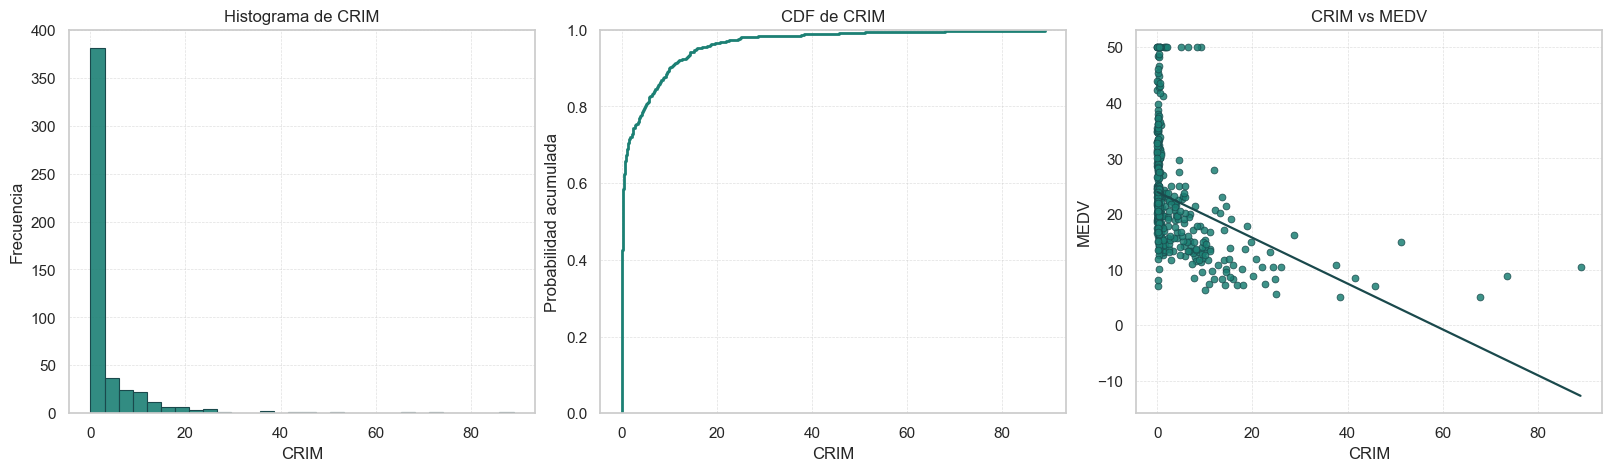

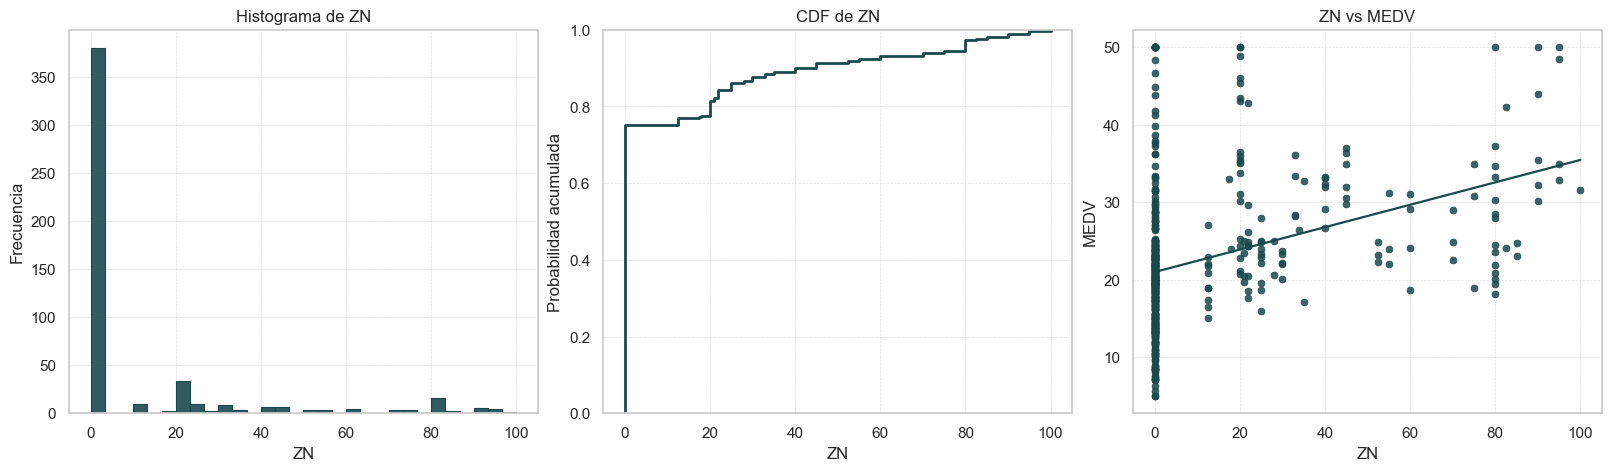

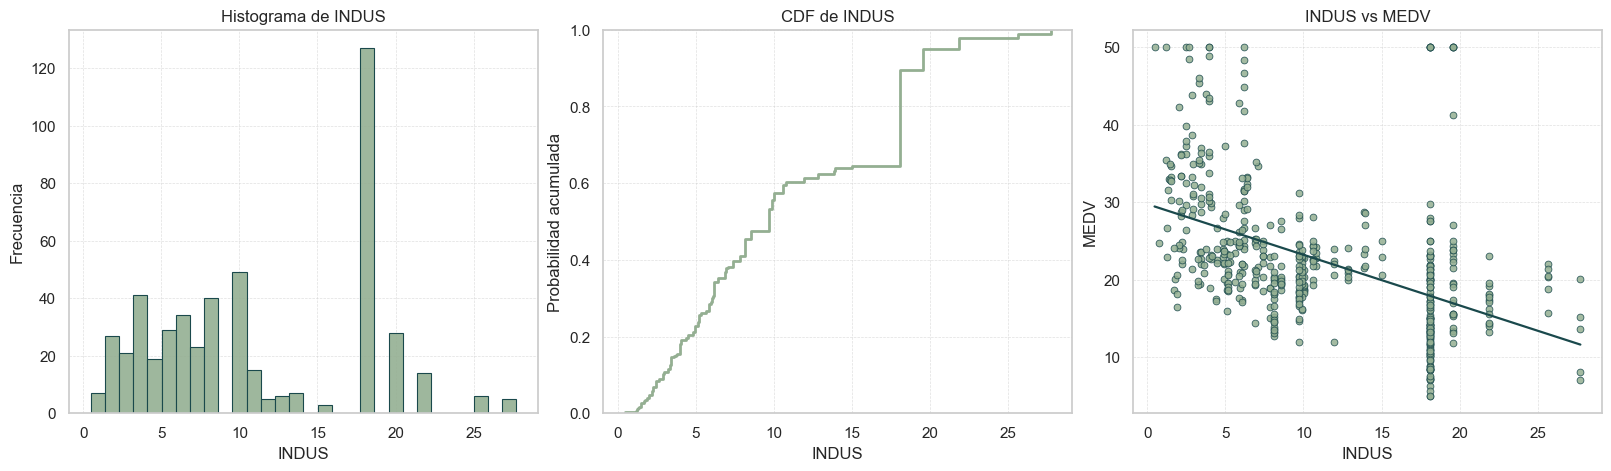

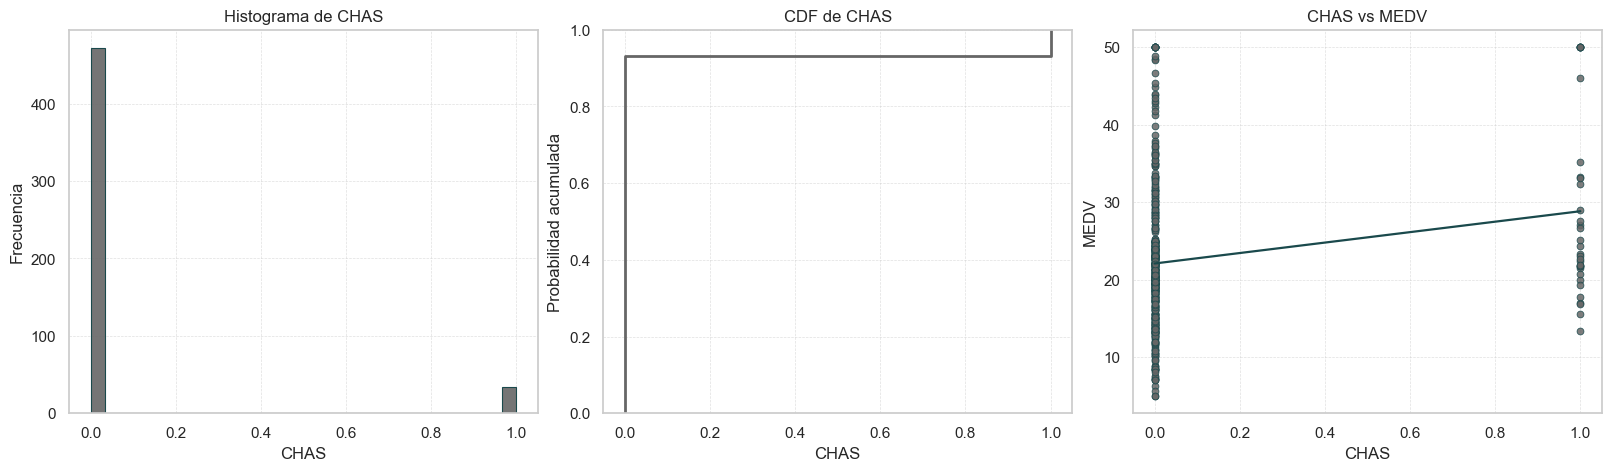

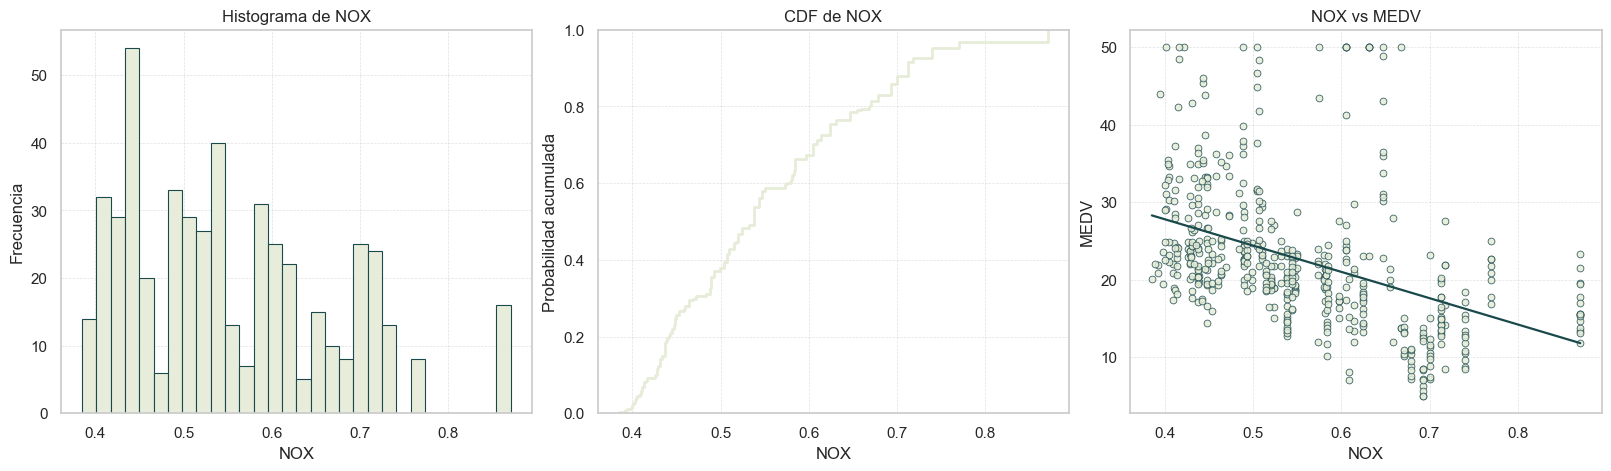

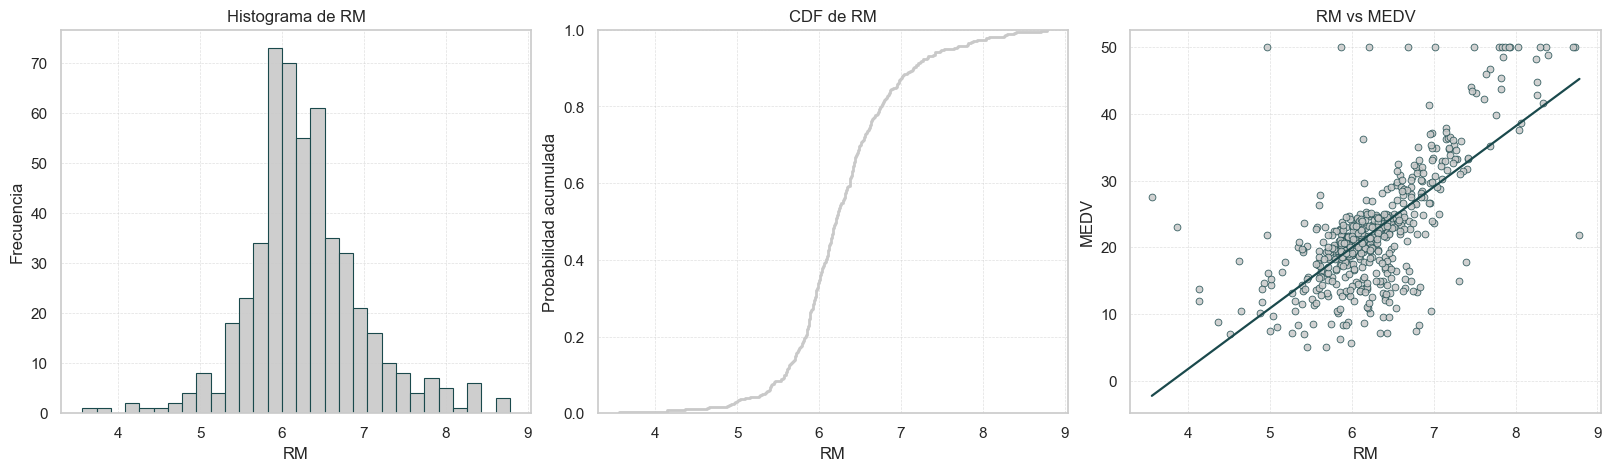

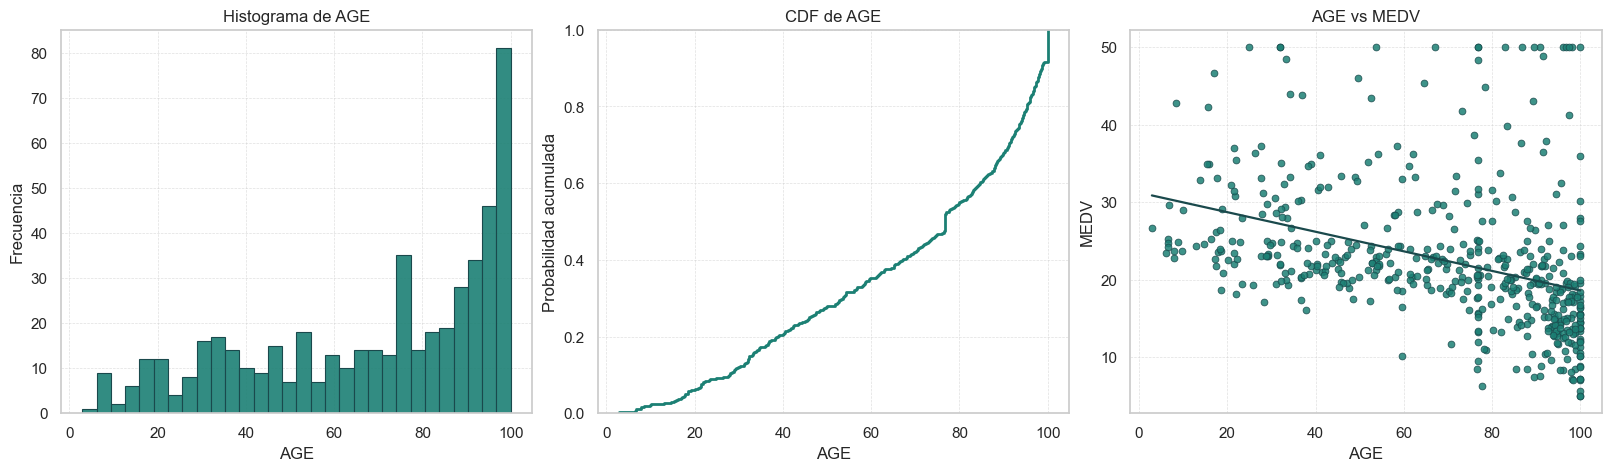

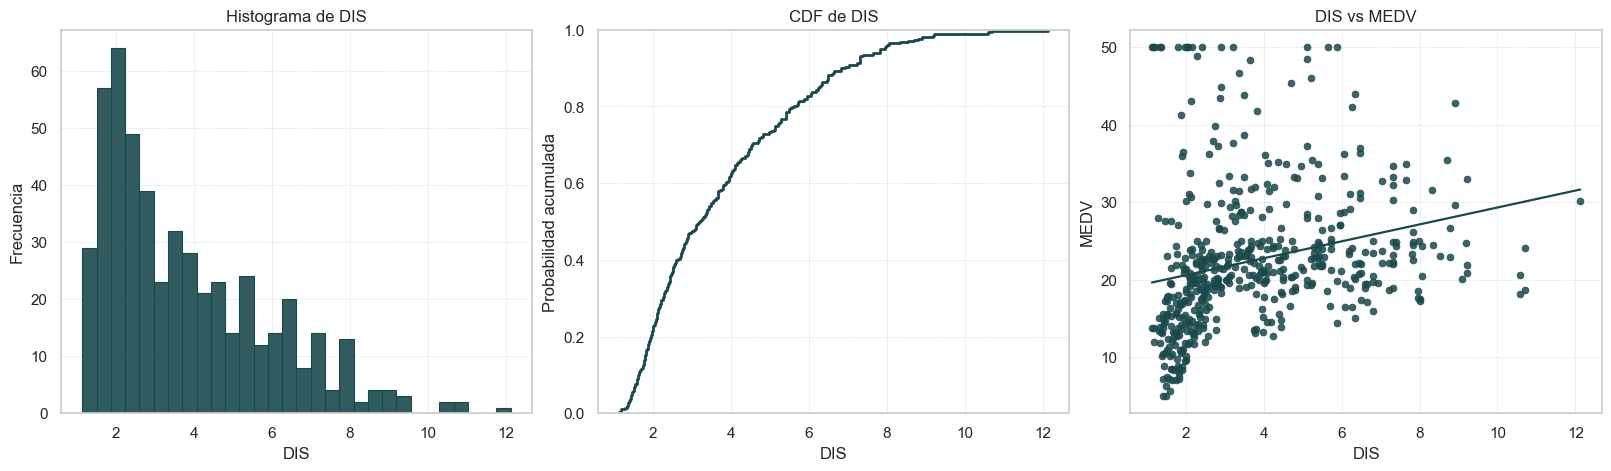

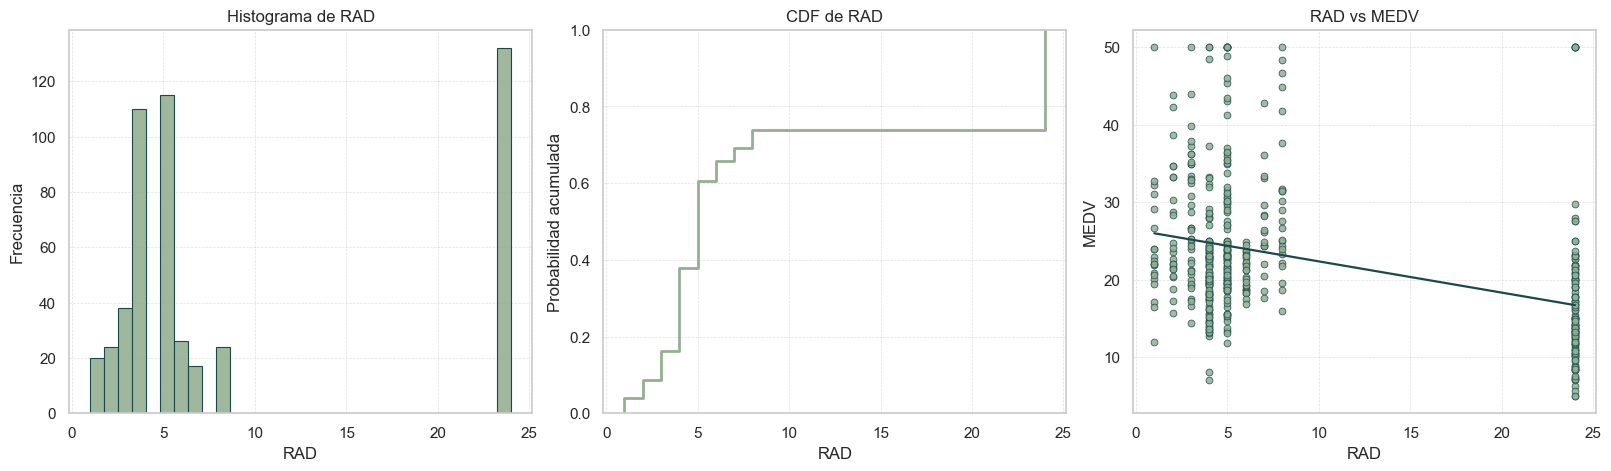

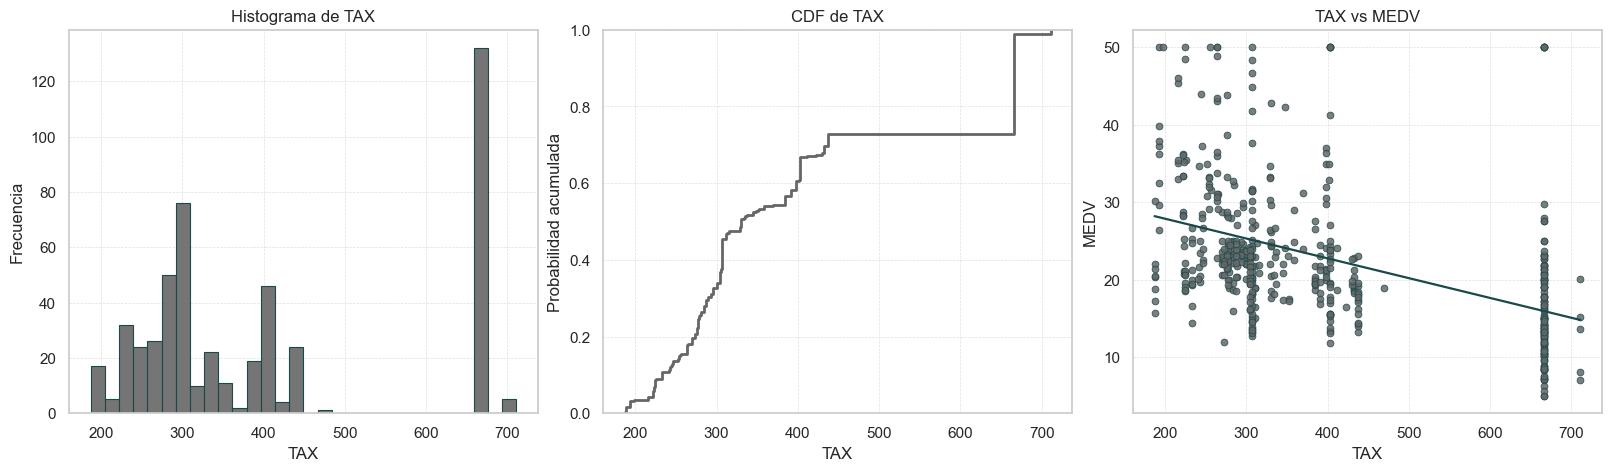

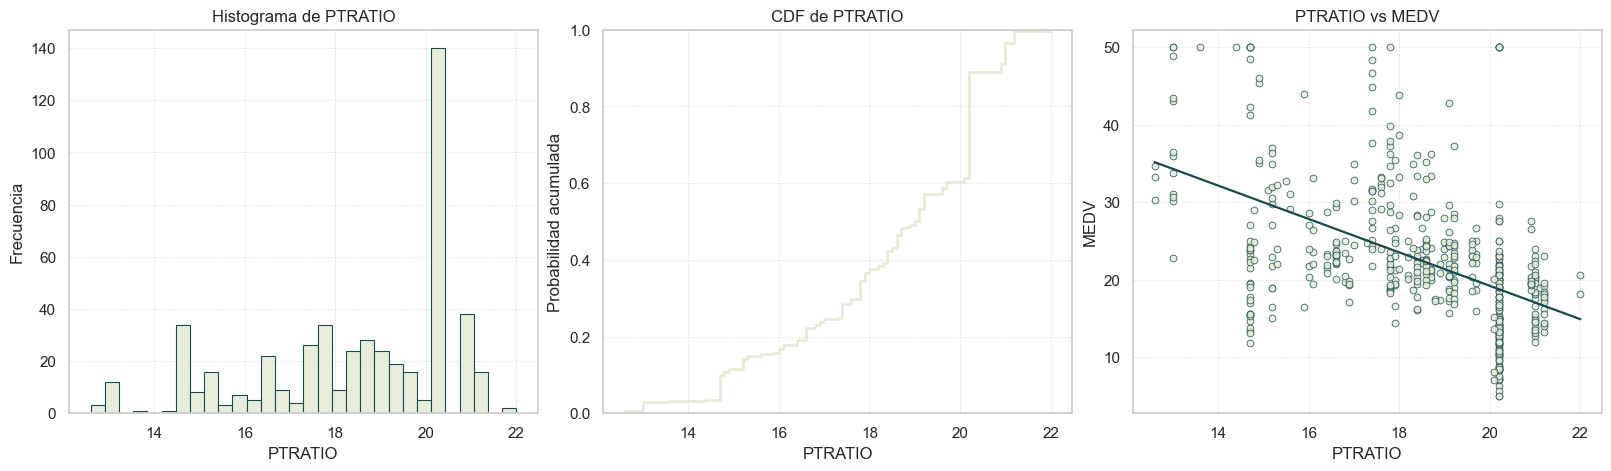

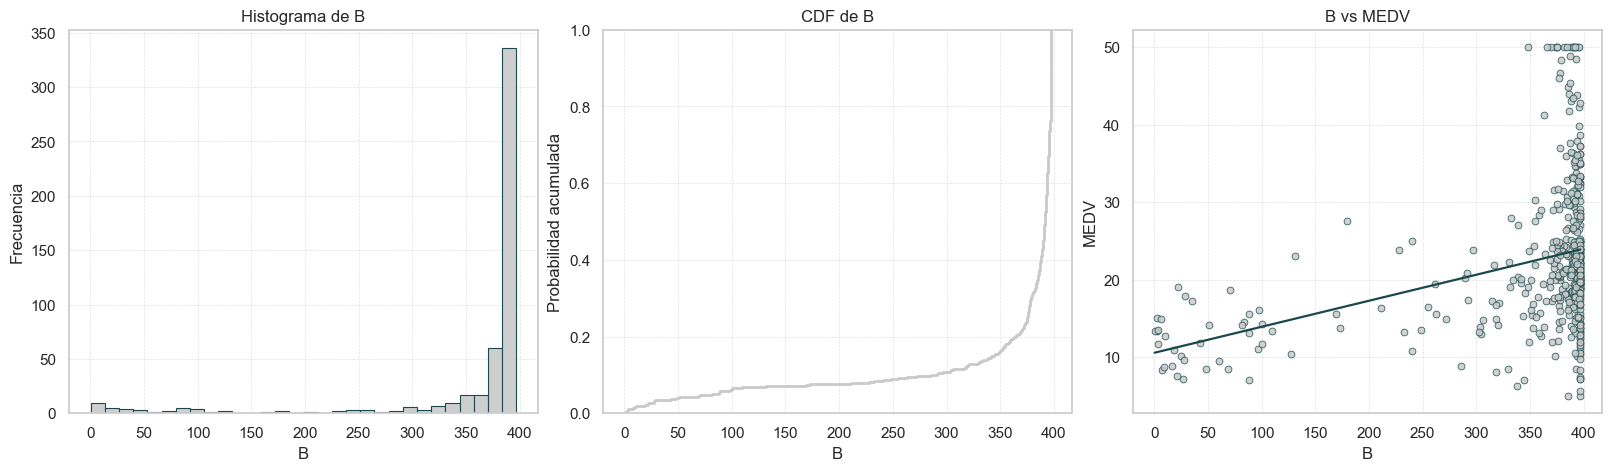

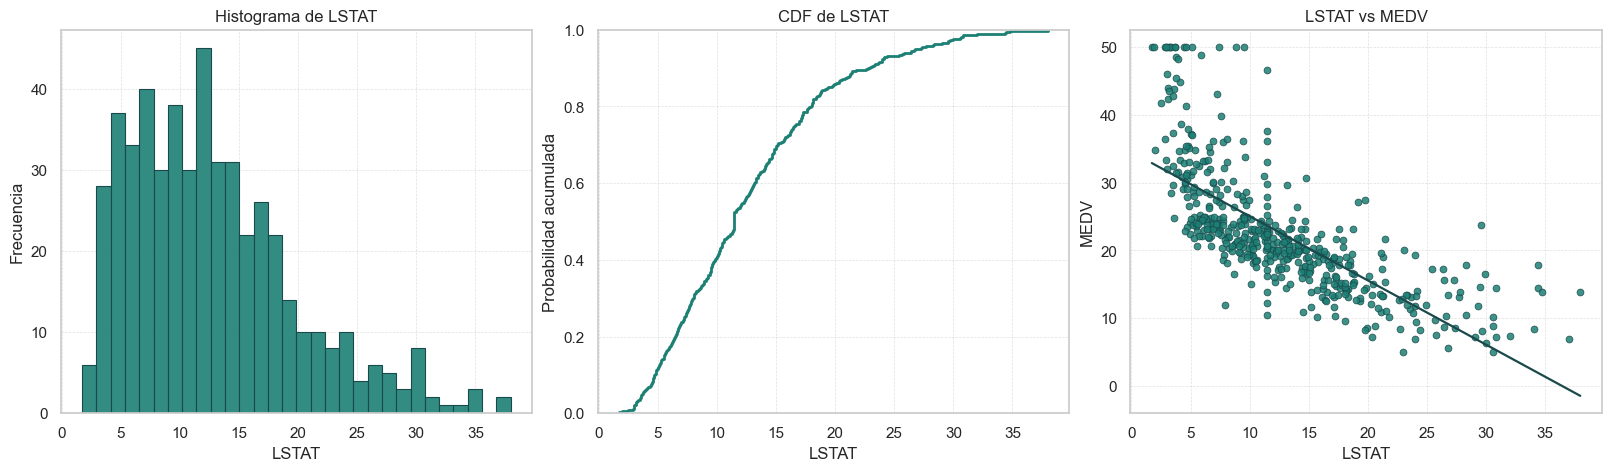

In [50]:

OKUO_PALETTE = ["#1C8074", "#1A494C", "#94AF92", "#666666", "#E6ECD8", "#C9C9C9"]
EDGE_COLOR   = "#1A494C"

sns.set_theme(style="whitegrid", font_scale=1.0)

# Asegura numeric_cols si no existe
if 'numeric_cols' not in locals():
    numeric_cols = df_viz.select_dtypes(include=[np.number]).columns.tolist()

# Selección del target (MEDV si existe; si no, última numérica)
target_candidates = [c for c in df_viz.columns if c.lower() == "medv"]
target = target_candidates[0] if target_candidates else numeric_cols[-1]

for i, c in enumerate(numeric_cols):
    if c == target:
        continue

    color = OKUO_PALETTE[i % len(OKUO_PALETTE)]
    fig, axes = plt.subplots(1, 3, figsize=(16, 4.6), constrained_layout=True)

    # --- Limpieza para el scatter (evitar NaN/inf) ---
    _tmp = df_viz[[c, target]].replace([np.inf, -np.inf], np.nan).dropna()

    # (1) Histograma
    sns.histplot(
        data=df_viz, x=c, bins=30,
        color=color, edgecolor=EDGE_COLOR, alpha=0.9, ax=axes[0]
    )
    axes[0].set_title(f"Histograma de {c}")
    axes[0].set_xlabel(c)
    axes[0].set_ylabel("Frecuencia")

    # (2) CDF (ECDF)
    sns.ecdfplot(
        data=df_viz, x=c,
        stat="proportion", complementary=False,
        color=color, linewidth=2.0, ax=axes[1]
    )
    axes[1].set_title(f"CDF de {c}")
    axes[1].set_xlabel(c)
    axes[1].set_ylabel("Probabilidad acumulada")
    axes[1].set_ylim(0, 1)

    # (3) Dispersión vs target (+ línea de tendencia opcional)
    axes[2].scatter(
        _tmp[c], _tmp[target],
        s=24, c=color, edgecolors=EDGE_COLOR, linewidths=0.6, alpha=0.85
    )
    # Línea de tendencia (opcional, comenta si no la quieres)
    if len(_tmp) >= 2:
        z = np.polyfit(_tmp[c], _tmp[target], 1)
        xs = np.linspace(_tmp[c].min(), _tmp[c].max(), 100)
        ys = z[0] * xs + z[1]
        axes[2].plot(xs, ys, color=EDGE_COLOR, linewidth=1.6)

    axes[2].set_title(f"{c} vs {target}")
    axes[2].set_xlabel(c)
    axes[2].set_ylabel(target)

    # Estética común
    for ax in axes:
        ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)

    plt.show()

    # --- Guardar automáticamente (opcional) ---
    # fig.savefig(f"dist_scatter_{c}.png", dpi=150, bbox_inches="tight")


In [52]:
df_viz.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.479140   10.768775   11.028893    0.067194    0.554695    6.284634   
std      8.570832   23.025124    6.704679    0.250605    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.083235    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      2.808720    0.000000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.845850    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.486962    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.925000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     76.800000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     93.575000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.664625   22.532806  
std      7.017219    9.197104  
min      1.730000    5.000000  
25%      7.230000   17.025000  
50%     11.430000   21.200000  
75%     16.570000   25.000000  
max     37.970000   50.000000

### Descripción de lo observado
* **CRIM**

  * *Significado*: tasa de criminalidad per cápita por distrito.
  * *Distribución*: **muy sesgada a la derecha**; muchos ~0 y pocos outliers altos.
  * *Relación con MEDV*: **negativa**; a mayor CRIM ↓ precio. Outliers empujan la recta.

* **ZN**

  * *Significado*: % de suelo residencial para lotes >25,000 ft² (baja densidad).
  * *Distribución*: **masas en 0** y escalones (picos en 20–100).
  * *Relación con MEDV*: **positiva débil–media** con alta dispersión.

* **INDUS**

  * *Significado*: % de acres de negocio no minorista (industrialización).
  * *Distribución*: **multimodal**, concentración ~5–10 y pico ~18–19.
  * *Relación con MEDV*: **negativa** clara; más INDUS ↓ precio.

* **CHAS**

  * *Significado*: dummy (1 si bordea el río Charles).
  * *Distribución*: **altamente desbalanceada** (casi todo 0).
  * *Relación con MEDV*: **ligeramente positiva**, efecto pequeño/incierto por bajo soporte.

* **NOX**

  * *Significado*: concentración de óxidos de nitrógeno (ppm; contaminación).
  * *Distribución*: amplia, algo sesgada hacia valores medios-altos.
  * *Relación con MEDV*: **negativa** marcada; más NOX ↓ precio.

* **RM**

  * *Significado*: número medio de habitaciones por vivienda.
  * *Distribución*: **casi normal** centrada ~6.
  * *Relación con MEDV*: **positiva fuerte** y casi lineal; predictor clave.

* **AGE**

  * *Significado*: % de unidades construidas antes de 1940 (antigüedad).
  * *Distribución*: tendencia a **valores altos** (muchas casas antiguas).
  * *Relación con MEDV*: **negativa moderada**; distritos antiguos ↓ precio.

* **DIS**

  * *Significado*: distancia ponderada a centros de empleo (suburbanidad).
  * *Distribución*: **sesgada a la derecha**; muchos valores bajos-medios.
  * *Relación con MEDV*: **positiva** moderada; más DIS ↑ precio (relación no lineal).

* **TAX**

  * *Significado*: tasa de impuesto a la propiedad por $10k de valor.
  * *Distribución*: **clusters por tramos** (p.ej., ~300, ~400, ~660–700).
  * *Relación con MEDV*: **negativa**; tasas altas ↓ precio.

* **LSTAT**

  * *Significado*: % de población con menor estatus socioeconómico.
  * *Distribución*: **cola larga** (sesgo a la derecha).
  * *Relación con MEDV*: **negativa muy fuerte** y **curva**; a mayor LSTAT, caída acelerada del precio.


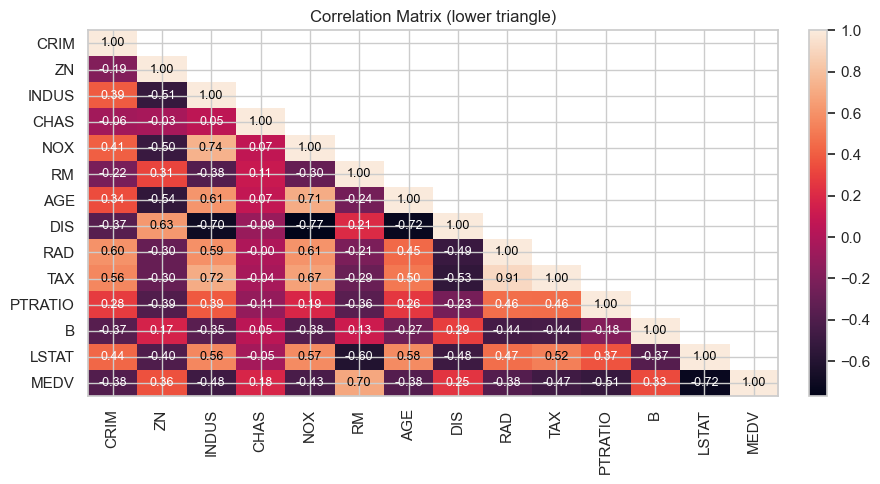

In [53]:
#Contrastemos lo anterior con correlacciones
corr = df_viz[numeric_cols].corr().values
labels = df_viz[numeric_cols].columns

# Enmascarar triángulo superior
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
corr_masked = np.ma.array(corr, mask=mask)

fig, ax = plt.subplots(figsize=(9, 5))

# Dibujar sólo triángulo inferior
im = ax.imshow(corr_masked, interpolation='nearest', aspect='auto')

# Ticks y títulos
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=90)
ax.set_yticklabels(labels)
ax.set_title("Correlation Matrix (lower triangle)")

# Anotar valores numéricos en triángulo inferior
# Elegimos color del texto según el fondo (claro/oscuro)
vmin, vmax = np.nanmin(corr), np.nanmax(corr)
m = im.get_cmap()
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if i >= j:  # sólo triángulo inferior (incluye diagonal)
            val = corr[i, j]
            if np.isnan(val):
                continue
            # Color de texto adaptativo
            rgba = m((val - vmin) / (vmax - vmin) if vmax > vmin else 0.5)
            # Luminancia aproximada
            luminance = 0.299*rgba[0] + 0.587*rgba[1] + 0.114*rgba[2]
            text_color = "black" if luminance > 0.6 else "white"
            ax.text(j, i, f"{val:.2f}", ha="center", va="center", color=text_color, fontsize=9)

# Barra de color y layout
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()


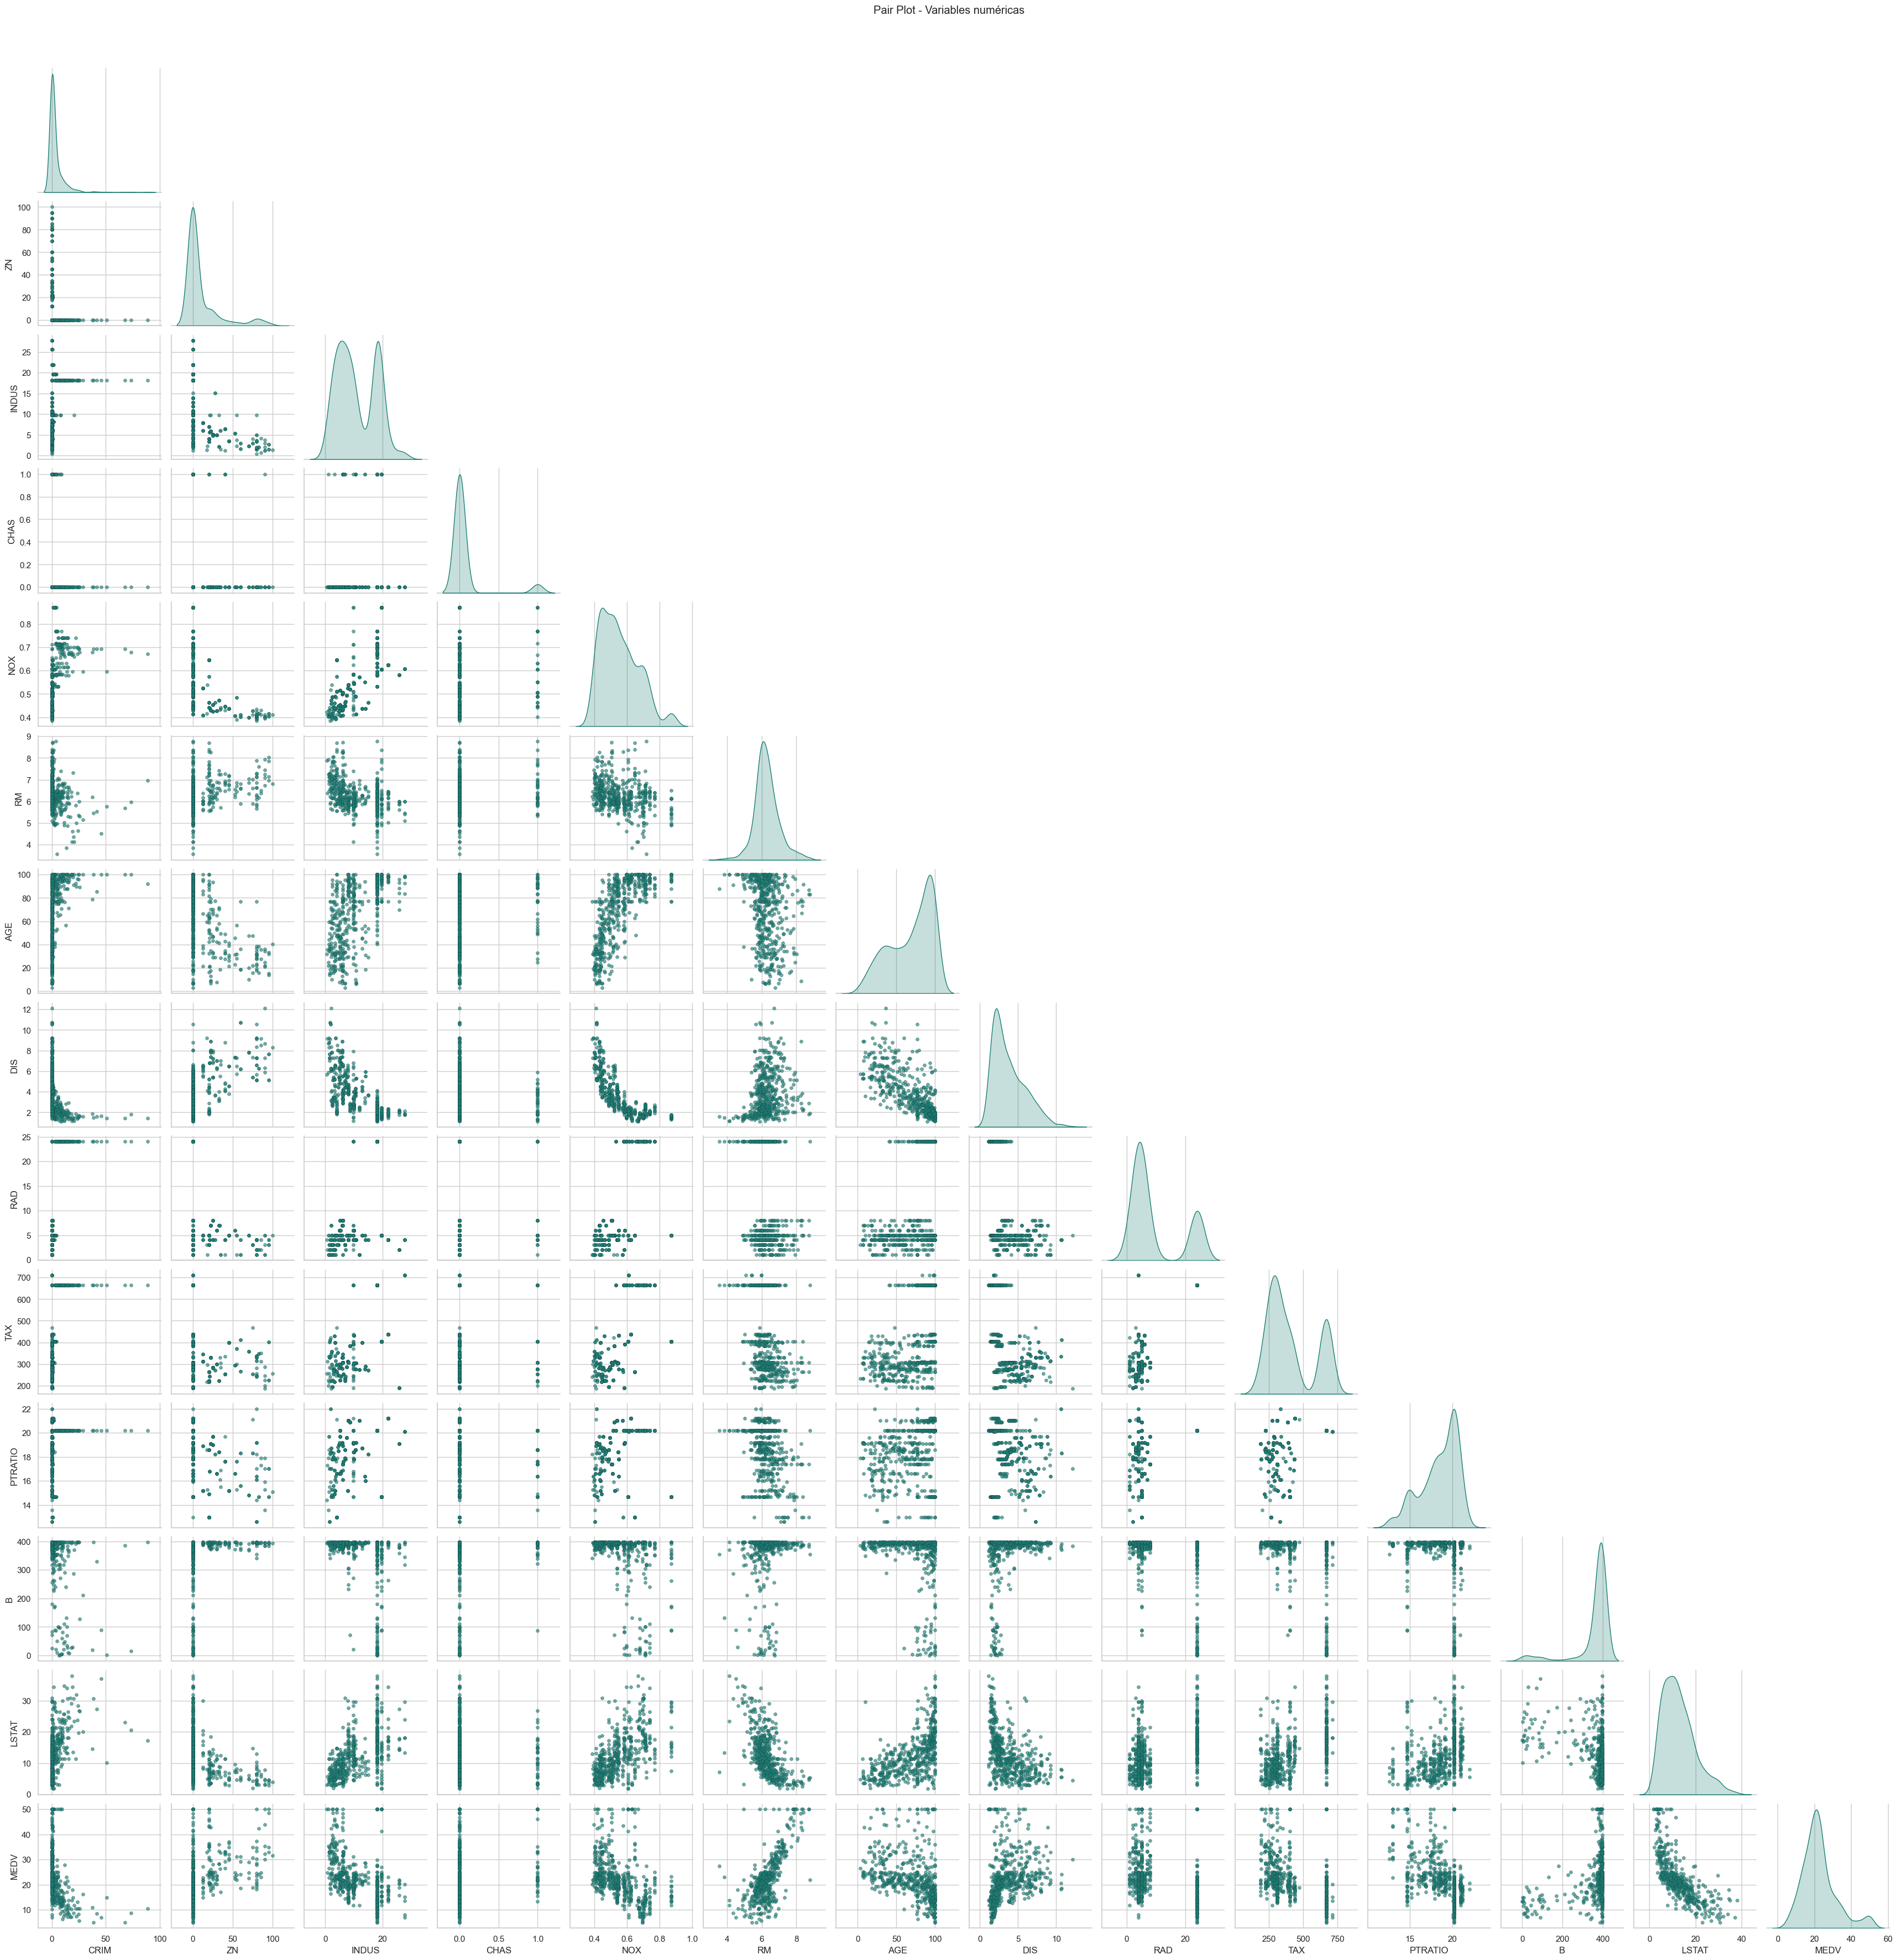

In [32]:

sns.set_theme(style="whitegrid", font_scale=1.0)
sns.set_palette(OKUO_PALETTE)

MAX_VARS = len(df_viz.columns)
vars_to_plot = numeric_cols[:MAX_VARS]

g = sns.pairplot(
    df_viz[vars_to_plot],
    corner=True,                 # solo triángulo inferior
    diag_kind="kde",             # "kde" o "hist"
    plot_kws={"alpha": 0.65, "edgecolor": EDGE_COLOR, "linewidth": 0.4, "s": 18},
    diag_kws={"fill": True}
)
g.fig.suptitle("Pair Plot - Variables numéricas", y=1.02)
plt.show()


/Users/juandavidrincon/okuo/drive_reader/.venv312/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning:

The palette list has more values (6) than needed (4), which may not be intended.

/Users/juandavidrincon/okuo/drive_reader/.venv312/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning:

The palette list has more values (6) than needed (4), which may not be intended.

/Users/juandavidrincon/okuo/drive_reader/.venv312/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning:

The palette list has more values (6) than needed (4), which may not be intended.

/Users/juandavidrincon/okuo/drive_reader/.venv312/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning:

The palette list has more values (6) than needed (4), which may not be intended.

/Users/juandavidrincon/okuo/drive_reader/.venv312/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning:

The palette list has more values (6) than needed (4), which may not be intend

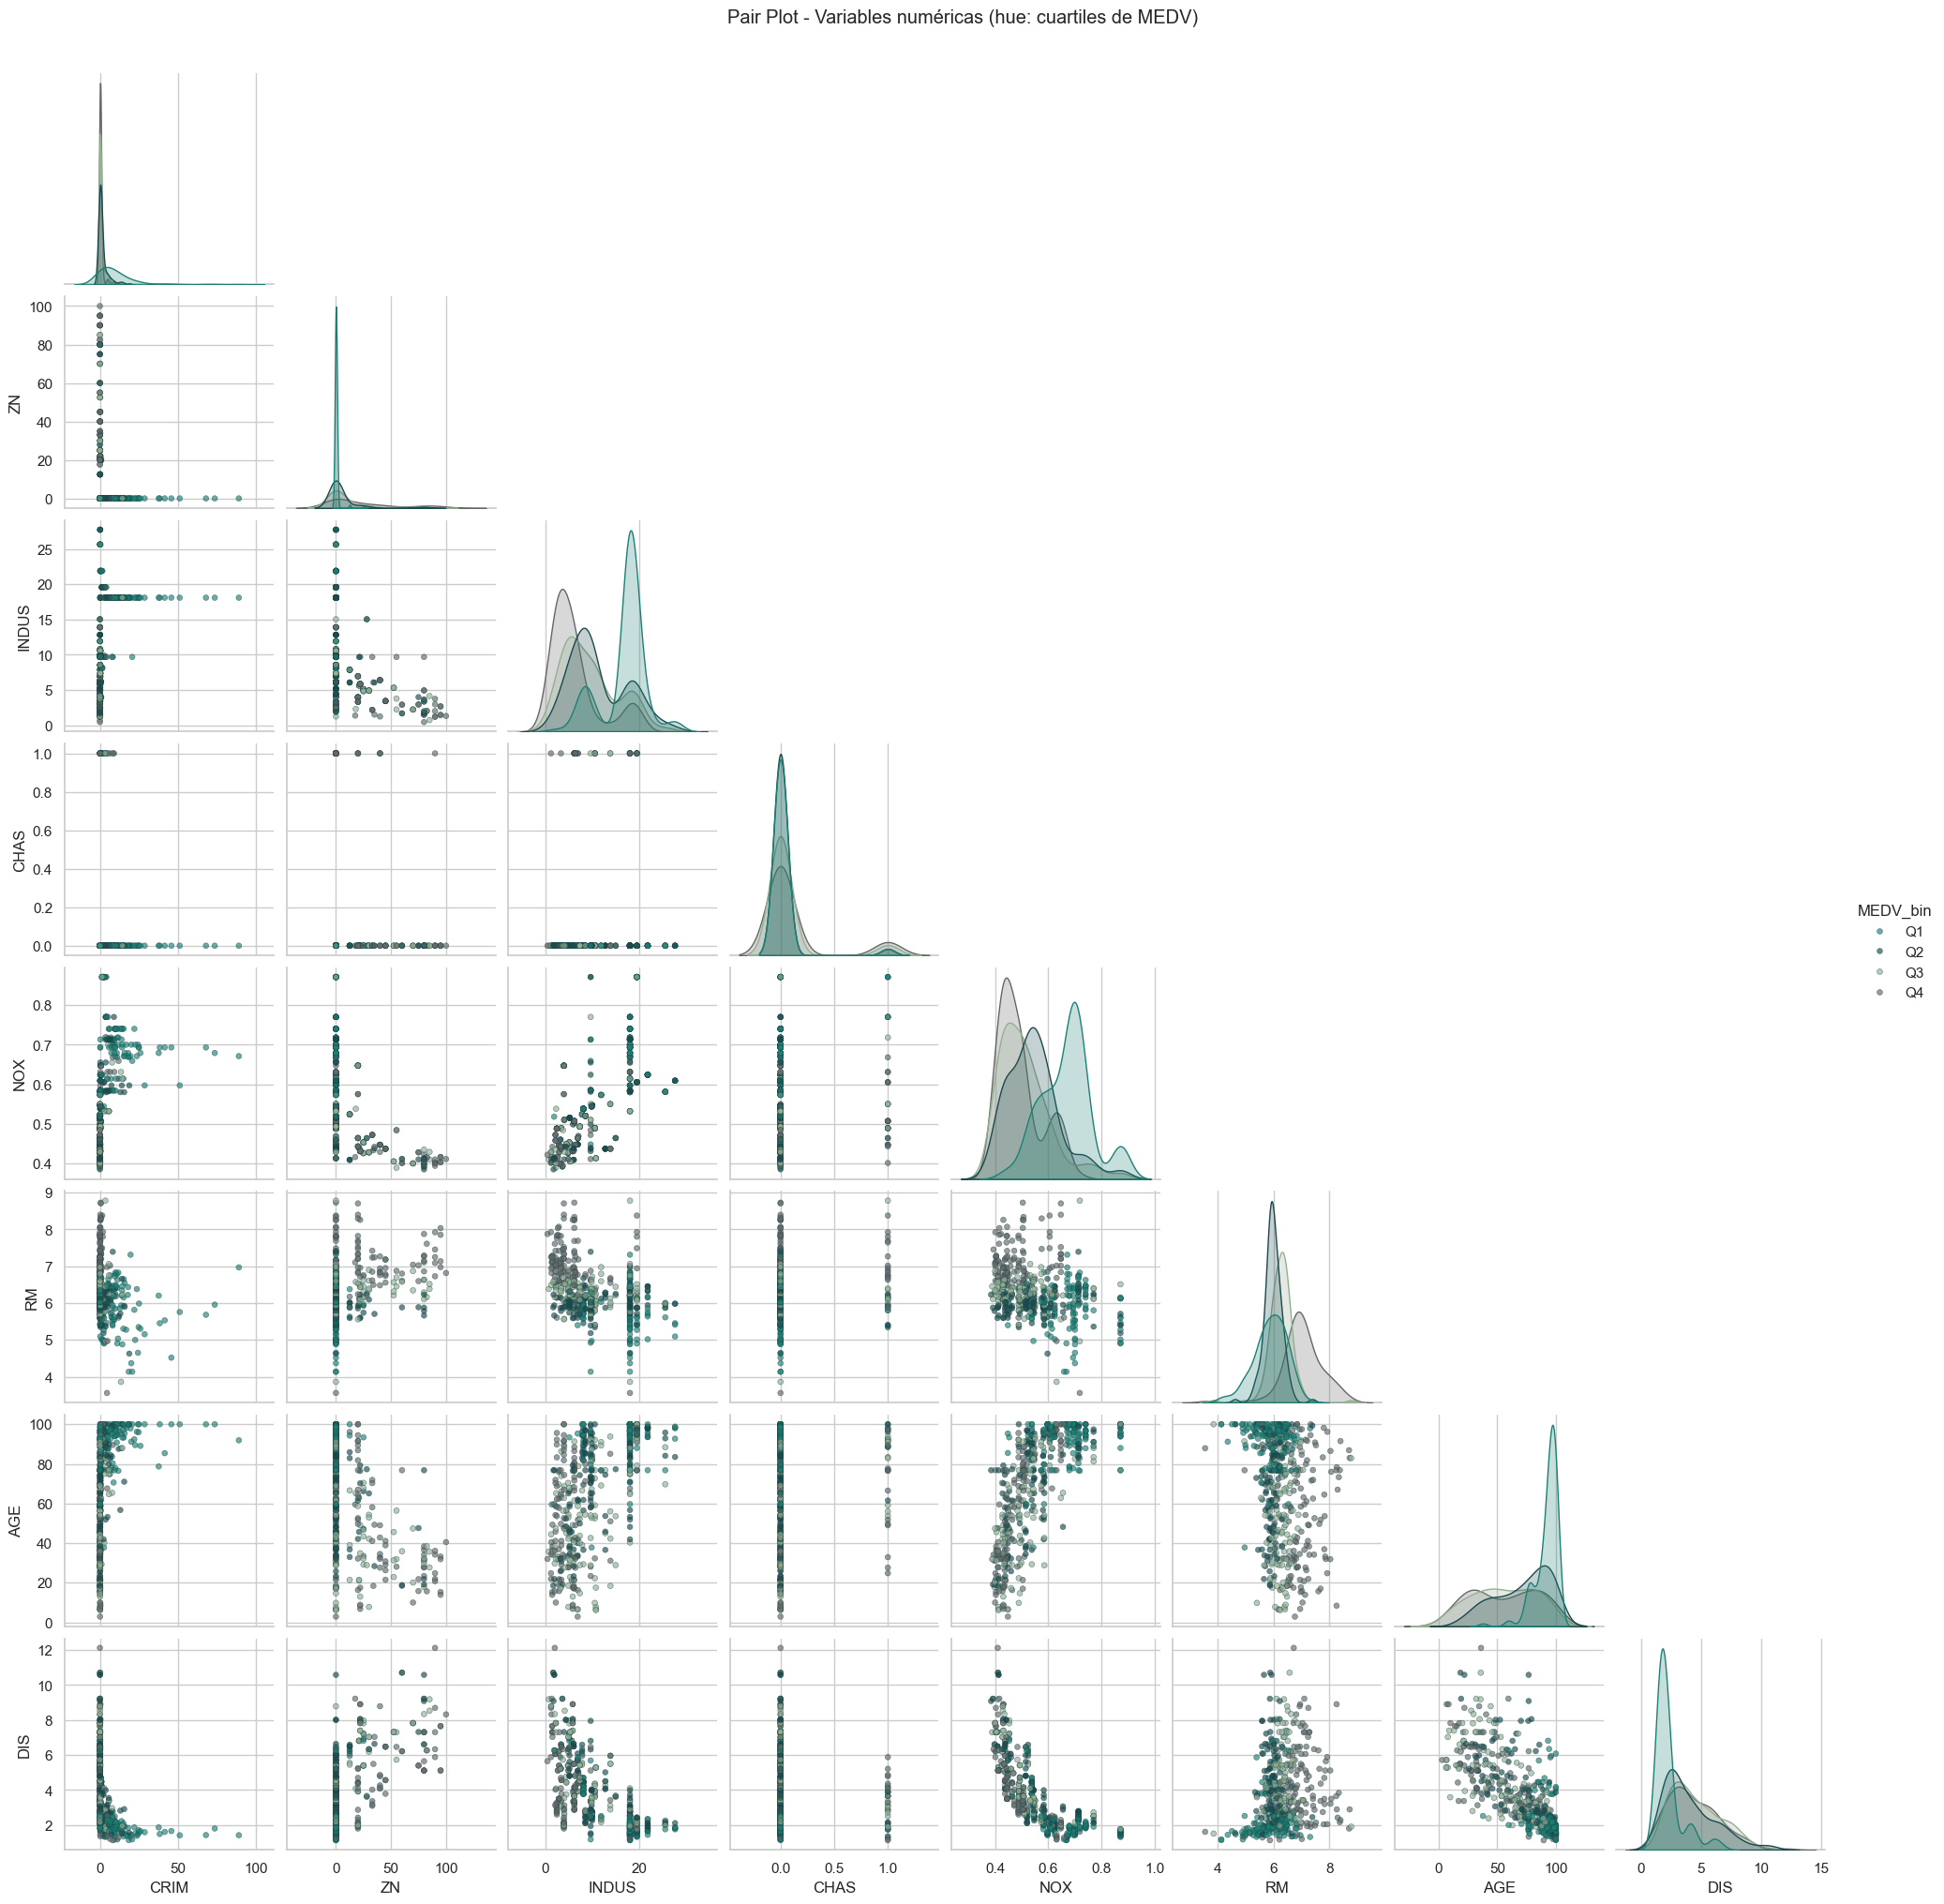

In [33]:

MAX_VARS = 8
vars_to_plot = numeric_cols[:MAX_VARS]


target_candidates = [c for c in df_viz.columns if c.lower() == "medv"]
target = target_candidates[0]

df_plot = df_viz[vars_to_plot + [target]].dropna()

df_plot["MEDV_bin"] = pd.qcut(df_plot[target], q=4, labels=["Q1", "Q2", "Q3", "Q4"])
g2 = sns.pairplot(
    df_plot,
    vars=vars_to_plot,
    hue="MEDV_bin",
    corner=True,
    diag_kind="kde",
    plot_kws={"alpha": 0.65, "edgecolor": EDGE_COLOR, "linewidth": 0.4, "s": 18},
    diag_kws={"fill": True},
    palette=OKUO_PALETTE
)
g2.fig.suptitle("Pair Plot - Variables numéricas (hue: cuartiles de MEDV)", y=1.02)
plt.show()

# --- Guardar (opcional) ---
# g.fig.savefig("pairplot_basico.png", dpi=150, bbox_inches="tight")
# g2.fig.savefig("pairplot_MEDV_cuartiles.png", dpi=150, bbox_inches="tight")


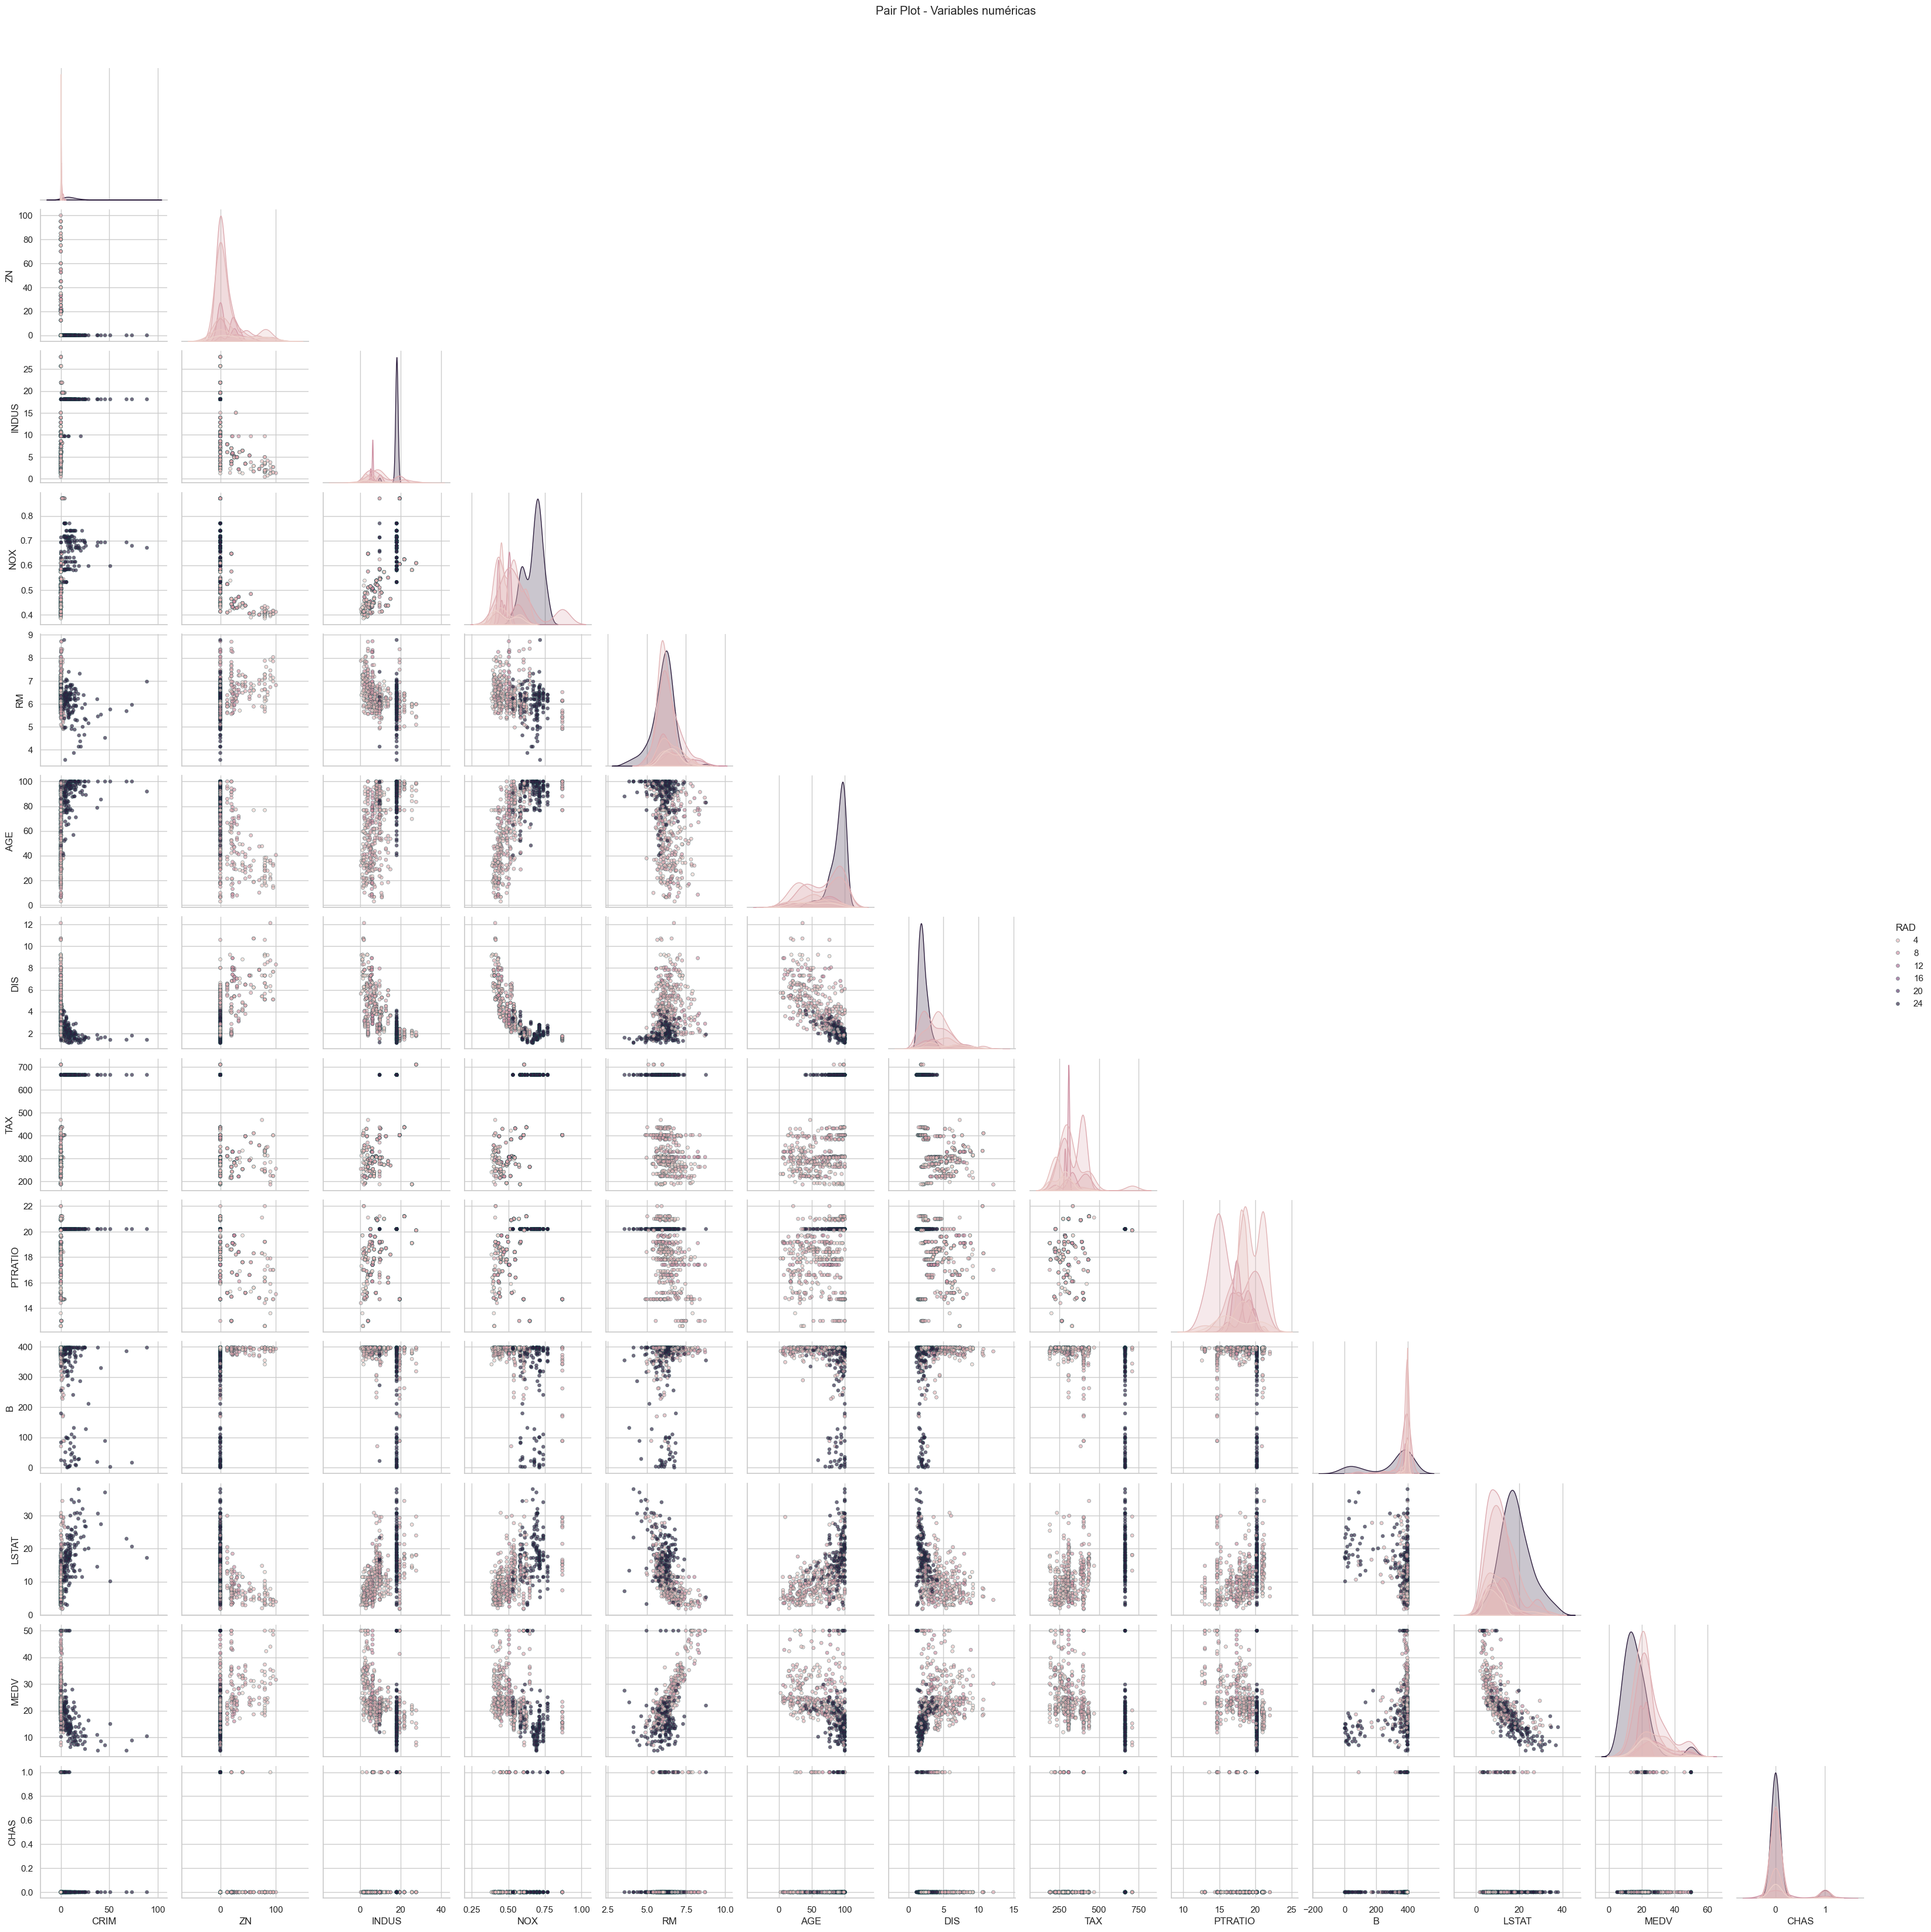

In [36]:
g = sns.pairplot(
    df_viz[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CHAS']],
    hue="RAD",
    corner=True,                 # solo triángulo inferior
    diag_kind="kde",             # "kde" o "hist"
    plot_kws={"alpha": 0.65, "edgecolor": EDGE_COLOR, "linewidth": 0.4, "s": 18},
    diag_kws={"fill": True}
)
g.fig.suptitle("Pair Plot - Variables numéricas", y=1.02)
plt.show()

In [38]:


X = df_viz.drop('MEDV', axis=1)
y = df_viz['MEDV']

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)



Shape de X: (506, 13)
Shape de y: (506,)


In [40]:
mi_scores = mutual_info_regression(X, y, random_state=42)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print("\n=== MUTUAL INFORMATION ===")
print(mi_series)


=== MUTUAL INFORMATION ===
LSTAT      0.618281
RM         0.527789
NOX        0.463975
INDUS      0.446359
PTRATIO    0.445391
TAX        0.354347
CRIM       0.316663
AGE        0.308766
DIS        0.297527
RAD        0.225137
B          0.163297
ZN         0.161814
CHAS       0.027812
dtype: float64


In [39]:
correlations = df_viz.corr()['MEDV'].abs().sort_values(ascending=False)
print("\n=== CORRELACIONES CON MEDV ===")
print(correlations)


=== CORRELACIONES CON MEDV ===
MEDV       1.000000
LSTAT      0.723093
RM         0.695360
PTRATIO    0.507787
INDUS      0.476394
TAX        0.468536
NOX        0.427321
CRIM       0.383895
RAD        0.381626
AGE        0.377572
ZN         0.362292
B          0.333461
DIS        0.249929
CHAS       0.183844
Name: MEDV, dtype: float64


In [41]:
# 3. VARIANZA
variance = X.var().sort_values(ascending=False)
print("\n=== VARIANZA DE VARIABLES ===")
print(variance)


=== VARIANZA DE VARIABLES ===
TAX        28404.759488
B           8334.752263
AGE          755.533102
ZN           530.156330
RAD           75.816366
CRIM          73.459162
LSTAT         49.241360
INDUS         44.952726
PTRATIO        4.686989
DIS            4.434015
RM             0.493671
CHAS           0.062803
NOX            0.013428
dtype: float64


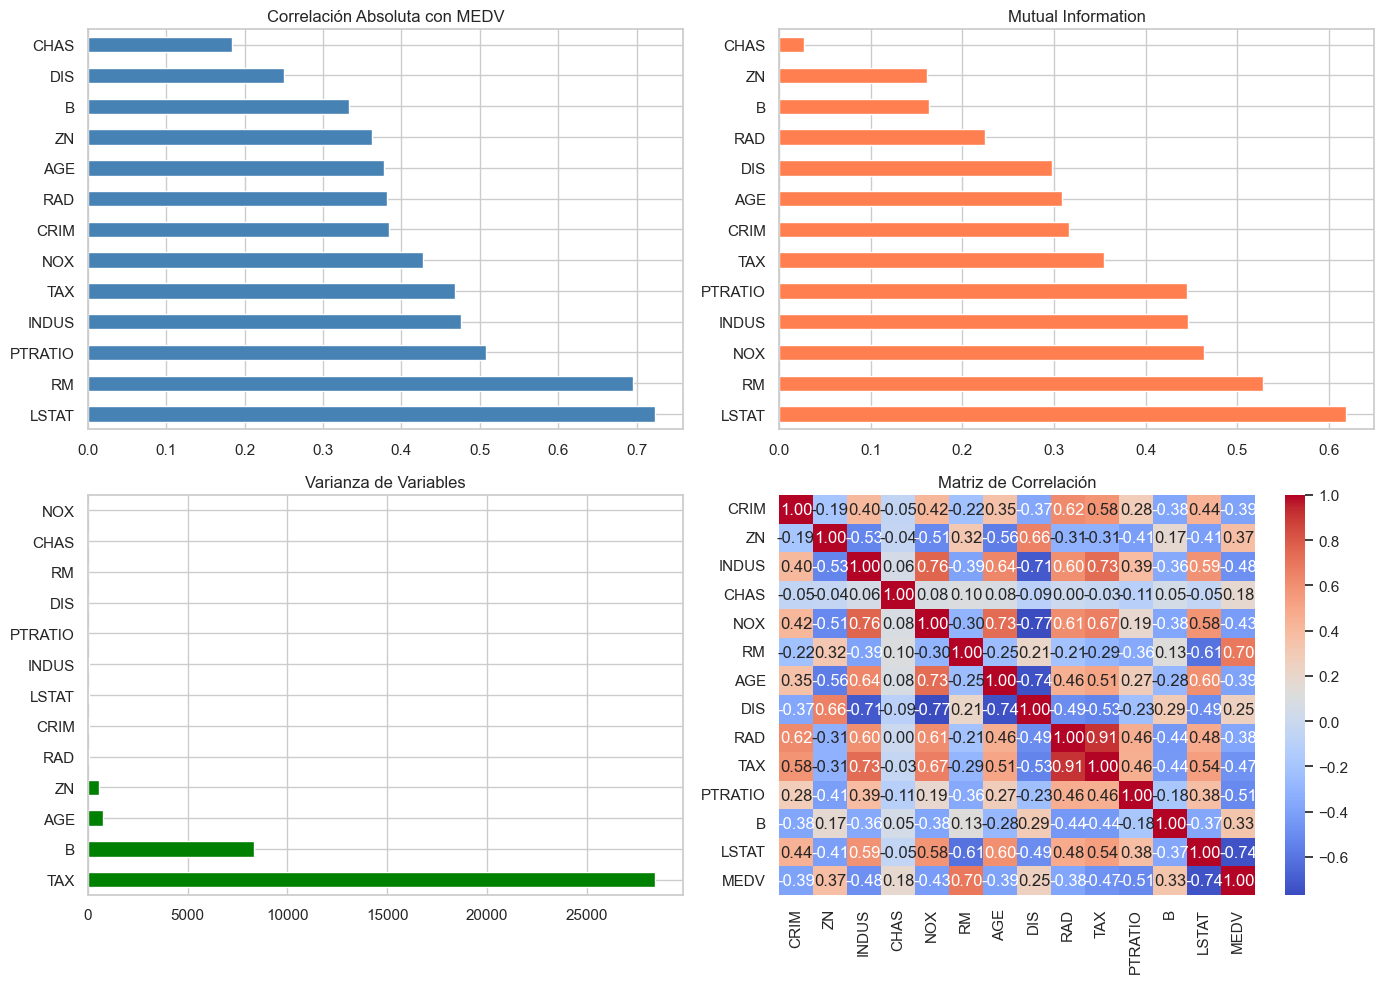

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
correlations.drop('MEDV').plot(kind='barh', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Correlación Absoluta con MEDV')

# Mutual Information
mi_series.plot(kind='barh', ax=axes[0, 1], color='coral')
axes[0, 1].set_title('Mutual Information')


# Varianza
variance.plot(kind='barh', ax=axes[1, 0], color='green')
axes[1, 0].set_title('Varianza de Variables')

# Matriz de correlación
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Matriz de Correlación')

plt.tight_layout()
plt.show()


In [43]:
# 5. RANKING COMBINADO
ranking_df = pd.DataFrame({
    'Correlation': correlations.drop('MEDV'),
    'Mutual_Info': mi_series,
    'Variance': variance
})

scaler = MinMaxScaler()
ranking_normalized = pd.DataFrame(
    scaler.fit_transform(ranking_df),
    columns=ranking_df.columns,
    index=ranking_df.index
)

# Puntuación promedio
ranking_normalized['Score_Promedio'] = ranking_normalized.mean(axis=1)
ranking_final = ranking_normalized.sort_values('Score_Promedio', ascending=False)

print("\n=== RANKING FINAL DE VARIABLES ===")
print(ranking_final)


=== RANKING FINAL DE VARIABLES ===
         Correlation  Mutual_Info  Variance  Score_Promedio
TAX         0.527941     0.553009  1.000000    6.936499e-01
LSTAT       1.000000     1.000000  0.001733    6.672444e-01
RM          0.948571     0.846744  0.000017    5.984441e-01
PTRATIO     0.600729     0.707199  0.000165    4.360308e-01
INDUS       0.542514     0.708838  0.001582    4.176446e-01
NOX         0.451510     0.738673  0.000000    3.967276e-01
CRIM        0.370980     0.489189  0.002586    2.875852e-01
AGE         0.359255     0.475815  0.026598    2.872226e-01
B           0.277453     0.229454  0.293428    2.667783e-01
RAD         0.366773     0.334184  0.002669    2.345417e-01
DIS         0.122549     0.456780  0.000156    1.931616e-01
ZN          0.330920     0.226942  0.018664    1.921751e-01
CHAS        0.000000     0.000000  0.000002    5.794239e-07


# Feture Importance a partir de correlacciones

### Qué predice mejor **MEDV**

* **Top lineales (|corr|)**: **RM (+0.70)** y **LSTAT (−0.74)** dominan; luego **PTRATIO (−0.51)**, **INDUS (−0.48)**, **TAX (−0.47)**, **NOX (−0.43)**.
* **DIS (+0.25)** y **ZN (+0.36)** ayudan pero con efecto más débil. **CHAS (~+0.18)** es marginal.

### Señales de **no linealidad** (Mutual Information)

* **MI** confirma a **LSTAT** y **RM** como top, y eleva la relevancia de **NOX/INDUS/PTRATIO/TAX**.
* Variables como **DIS** y **ZN** ganan algo de MI frente a su correlación → hay patrón no estrictamente lineal.
* Conclusión: añade **splines/transformaciones** (p. ej., `sqrt(LSTAT)`, `log(DIS)`, `log1p(CRIM)`).

### **Colinealidades** importantes (cuidado en modelos lineales)

* **RAD–TAX ≈ 0.91**, **NOX–INDUS ≈ 0.74**, **DIS–NOX ≈ −0.77**, **DIS–INDUS ≈ −0.70**.


### Lecturas por variable

* **RM**: el más **positivo** con MEDV; casi lineal.
* **LSTAT**: **negativo fuerte** y curvatura; transformar ayuda.
* **PTRATIO**: **negativo** moderado; calidad educativa importa.
* **INDUS / NOX**: ambos **negativos** y muy correlacionados entre sí (zona industrial/contaminación).
* **TAX**: **negativo**; además casi duplicado con **RAD** (tramos fiscales).
* **CRIM**: **negativo** con outliers; mejor `log1p`.
* **DIS**: **positivo** moderado; relación no lineal (suburbios).
* **ZN**: **positivo** débil-medio; estructura por escalones.
* **CHAS**: efecto **pequeño** por desbalance.

### Sobre la **varianza**

* Grandes varianzas (p. ej., **TAX**, **B**) no significan “más importancia”; sólo escala.
